# 8.6 Keras 개요

### 1. 전처리(Preprocessing)
Tokenizer() : 토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용됩니다. 정수 인코딩 챕터를 참고하세요.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
fit_text = 'The earth is an awesome place live'
t.fit_on_texts([fit_text])


test_text = 'The earth is an great place live'
sequences = t.texts_to_sequences([test_text])[0]

print('sequences : ', sequences)
print('word_index : ', t.word_index)

sequences :  [1, 2, 3, 4, 6, 7]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


pad_sequence() : 전체 훈련 데이터에서 
- 각 샘플의 길이는 서로 다를 수 있습니다. 
- 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 
- 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 
- 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 

케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen=5, padding='pre')

array([[0, 0, 1, 2, 3],
       [0, 3, 4, 5, 6],
       [0, 0, 0, 7, 8]], dtype=int32)

- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움

### 2. 워드 임베딩(Word Embedding)
워드 임베딩이란 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다. 밀집 벡터가 무엇일까요? 이미 배운 개념인 원-핫 벡터와 비교해봅시다. 원-핫 벡터는 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터였습니다. 또한 벡터의 차원이 대체적으로 크다는 성질을 가졌습니다. 원-핫 벡터의 예는 다음과 같습니다.

Ex) [0 1 0 0 0 0 ... 중략 ... 0 0 0 0 0 0 0] # 차원이 굉장히 크면서 대부분의 값이 0

대부분의 값이 0인 이러한 벡터를 희소 벡터(sparse vector)라고 합니다. 원-핫 벡터는 희소 벡터의 예입니다. 원-핫 벡터는 단어의 수만큼 벡터의 차원을 가지며 단어 간 유사도가 모두 동일하다는 단점이 있습니다. 반면, 희소 벡터와 표기상으로도 의미상으로도 반대인 벡터가 있습니다. 대부분의 값이 실수이고, 상대적으로 저차원인 밀집 벡터(dense vector)입니다. 아래는 밀집 벡터의 예입니다.

Ex) [0.1 -1.2 0.8 0.2 1.8] # 상대적으로 저차원이며 실수값을 가짐

간단히 표로 정리하면 아래와 같습니다.

 -  | 원핫 벡터 | 임베딩 벡터
--- | --- | ---
차원|고차원(단어 집합의 크기)|저차원
다른 표현|희소 벡터의 일종|밀집 벡터의 일종
표현 방법|수동|훈련 데이터로부터 학습함
값의 타입|1과 0|실수

단어를 원-핫 벡터로 만드는 과정을 **원-핫 인코딩**이라고 하였습니다. 

이와 대비적으로 단어를 밀집 벡터로 만드는 작업을 **워드 임베딩(word embedding)**이라고 합니다. 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다. 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다. 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.

Embedding() : Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 텐서를 리턴합니다.

아래의 코드는 실제 동작되는 코드가 아니라 의사 코드(pseudo-code)로 임베딩의 개념 이해를 돕기 위해서 작성되었습니다

 ```
# 문장 토큰화와 단어 토큰화
text = [['Hope','to','see','you','soon'],['Nice','to','see','you','again']]

# 각 단어에 대한 정수 인코딩
text = [[0,1,2,3,4],[5,1,2,3,6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7,2, input_length=5)
# 7 : 단어의 갯수, 즉 단어 집합(Vocabulary)의 크기
# 2 : 임베딩한 후의 백터의 크기
# 5 : 각 입력 시퀀스의 길이
```

### 3. 모델링(Modeling)
**Sequential()** : 인공 신경망 챕터에서 입력층, 은닉층, 출력층에 대해서 배웠습니다. 케라스에서는 이러한 층을 구성하기 위해 Sequential()을 사용합니다. 
- Sequential()을 model로 선언한 뒤에 
- model.add()라는 코드를 통해 층을 단계적으로 추가합니다. 

아래는 model.add()로 층을 추가하는 예제 코드를 보여줍니다. 실제로는 괄호 사이에 있는 온점 대신에 실제 층의 이름을 기재해야 합니다.

``` python
from tensorflow.keras.models import Sequential  
model = Sequential()  
model.add(...) # 층 추가  
model.add(...) # 층 추가  
model.add(...) # 층 추가
```

Embedding()을 통해 생성하는 임베딩 층(embedding layer) 또한 인공 신경망의 층의 하나이므로 model.add()로 추가해야합니다.

``` python
from tensorflow.keras.models import Sequential  
model = Sequential()  
model.add(Embedding(vocabulary, output_dim, input_length))
```
Dense() : 전결합층(fully-conntected layer)을 추가합니다. model.add()를 통해 추가할 수 있습니다.

``` python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))
```

위의 코드에서 Dense()는 한번 사용되었지만 더 많은 층을 추가할 수 있습니다. Dense()의 대표적인 인자를 보겠습니다.

첫번째 인자 = 출력 뉴런의 수.  
input_dim = 입력 뉴런의 수. (입력의 차원)  
activation = 활성화 함수.

- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
- sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

위 코드에서 사용된 Dense()의 의미를 보겠습니다. 첫번째 인자의 값은 1인데 이는 총 1개의 출력 뉴런을 의미합니다. Dense()의 두번째 인자인 input_dim은 입력층의 뉴런 수를 의미합니다. 이 경우에는 3입니다. 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었습니다. 이를 시각화하면 다음과 같습니다.

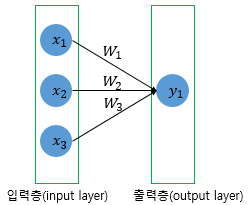

이제 Dense()를 사용하여 전결합층을 하나 더 추가해보겠습니다.
``` python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층
```

이번에는 Dense()가 두번 사용되었습니다. Dense()가 처음 사용되었을 때와 추가로 사용되었을 때의 인자는 조금 다릅니다. 이제 첫번째 사용된 Dense()의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런입니다. 뒤에 층이 하나 더 생겼기 때문입니다.

두번째 Dense()는 input_dim 인자가 없는데, 이는 이미 이전층의 뉴런의 수가 8개라는 사실을 알고있기 때문입니다. 위의 코드에서 두번째 Dense()는 마지막 층이므로, 첫번째 인자 1은 결국 출력층의 뉴런의 개수가 됩니다. 이를 시각화하면 다음과 같습니다

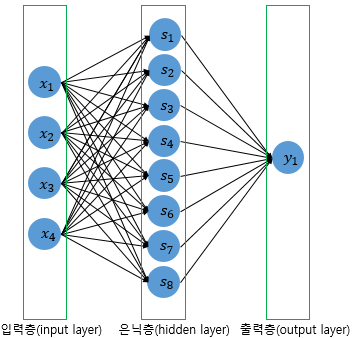

이 외에도 LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있습니다. 일부는 뒤의 챕터에서 배우게 됩니다.

summary() : 모델의 정보를 요약해서 보여줍니다.

---
``` python
# 위의 코드의 연장선상에 있는 코드임.
model.summary()
```
---

### 4. 컴파일(Compile)과 훈련(Training)
compile() : 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택할 수 있습니다.

In [11]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

max_features = 1000

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

위 코드는 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일 하는 과정을 보여줍니다.

- optimizer : 훈련 과정을 설정하는 옵티마이저를 설정합니다. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.  
- loss : 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
- metrics : 훈련을 모니터링하기 위한 지표를 선택합니다.

대표적으로 사용되는 손실 함수와 활성화 함수의 조합은 아래와 같습니다. 더 많은 함수는 케라스 공식문서에서 확인 가능합니다.

문제 유형	| 손실 함수명	| 출력층의 활성화 함수명	| 참고 설명
---|---|---|---
회귀 문제	|mean_squared_error(평균 제곱 오차)	|-	|-
다중 클래스 분류	|categorical_crossentropy (범주형 교차 엔트로피)	|소프트맥스	|10챕터 로이터 뉴스 분류하기 실습 참고
다중 클래스 분류	|sparse_categorical_crossentropy	|소프트맥스	|범주형 교차 엔트로피와 동일하지만 이 경우 원-핫 인코딩이 된 상태일 필요없이 정수 인코딩 된 상태에서 수행 가능.
이진 분류	|binary_crossentropy(이항 교차 엔트로피)	|시그모이드	|10챕터 스팸 메일 분류하기, IMDB 리뷰 감성 분류하기 실습 참고


이진 분류(Binary Classification)와 다중 클래스 분류(Multi-class Classification)에 대해서는 10챕터에서 학습합니다.

fit() : 모델을 학습합니다. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하기도 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다. 그런 의미에서 fit()은 모델의 훈련을 시작한다는 의미를 가지고 있습니다.

---
``` python
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)
```
---
- 첫번째 인자 = 훈련 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
- epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
- batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

좀 더 많은 인자를 사용할 때를 보겠습니다.

---
``` python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```
---

validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합니다. 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

validation_split= validation_data 대신 사용할 수 있습니다. 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용합니다. 역시나 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용됩니다. 아래는 validation_data 대신에 validation_split을 사용했을 경우를 보여줍니다.

---
``` python
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))
```
---

- verbose = 학습 중 출력되는 문구를 설정합니다.
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

아래는 verbose의 값이 1일 때와 2일 때를 보여줍니다.

--- 
``` python 
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000
```
---

### 5. 평가(Evaluation)와 예측(Prediction)
evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

---
``` python
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)
```
---

- 첫번째 인자 = 테스트 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
- batch_size = 배치 크기.

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.

---
``` python
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)
```
---

- 첫번째 인자 = 예측하고자 하는 데이터.
- batch_size = 배치 크기.


### 6. 모델의 저장(Save)과 로드(Load)
복습을 위한 스터디나 실제 어플리케이션 개발 단계에서 구현한 모델을 저장하고 불러오는 일은 중요합니다. 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미입니다.

save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.

---
``` python
model.save("model_name.h5")
```
---

load_model() : 저장해둔 모델을 불러옵니다.

---
``` python
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")
```
---

### 7. 함수형 API(functional API)
이 책의 대부분의 실습은 위에서 배운 Sequential API를 통해 이루어집니다. 위의 코드들은 사용하기에 매우 간단하지만, 복잡한 모델을 설계하기 위해서는 부족함이 있습니다.

sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일을 하기에는 한계가 있습니다. 이번에는 복잡한 모델을 생성할 수 있는 방식인 functional API(함수형 API)에 대해서 알아봅니다.

functional API에 대한 자세한 소개는 케라스 공식 문서에서도 확인할 수 있습니다.
링크 : https://keras.io/getting-started/functional-api-guide/

##### 1) sequential API로 만든 모델

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation = 'softmax'))

위와 같은 방식은 직관적이고 편리하지만 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 인공 신경망을 구현할 수 없습니다.

##### 2) functional API로 만든 모델
functional API는 각 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계합니다. functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.

##### 2.1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
sequential API와는 다르게 functional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 합니다. 여기서는 입력의 차원이 1인 전결합 피드 포워드 신경망(Fully-connected FFNN)을 만든다고 가정해보겠습니다.

In [16]:
from tensorflow.keras.layers import Input

# 10개의 입력을 받는 입력층을 보여줍니다. 이제 위의 코드에 은닉층과 출력층을 추가해봅시다.
inputs = Input(shape=(10,))

In [18]:
from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

In [19]:
# 이제 위의 코드를 하나의 모델로 구성해보겠습니다. 이는 Model에 입력 텐서와 출력 텐서를 정의하여 완성됩니다.
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs = output)

지금까지의 내용을 정리하면 다음과 같습니다.

- Input() 함수에 입력의 크기를 정의합니다.
- 이전층을 다음층 함수의 입력으로 사용하고, 변수에 할당합니다.
- Model() 함수에 입력과 출력을 정의합니다.

이제 이를 model로 저장하면 sequential API를 사용할 때와 마찬가지로 model.compile, model.fit 등을 사용 가능합니다.

In [21]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)

NameError: name 'data' is not defined

이번에는 변수명을 달리해서 FFNN을 만들어보겠습니다. 이번에는 은닉층과 출력층의 변수를 전부 x로 통일하였습니다.

In [23]:
inputs = Input(shape=(10,))

x = Dense(8, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)
x = Dense(1, activation='linear')(x)

model = Model(inputs, x)

##### 2.2) 선형회귀 (Linear Regression)


In [26]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

linear_model.compile(optimizer='sgd', loss='mse')
linear_model.fit(x=dat_test, y=y_cts_test, epochs=50, verbose=0)
linear_model.fit(x=dat_test, y=y_cts_test, epochs=1, verbose=1)

NameError: name 'dat_test' is not defined

##### 2.3) 로지스틱 회귀(Logistic Regression)

In [31]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1,activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_nodel.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
logistic_model.optimizer.lr = 0.001
logistic_model.fit(x=x_train_data, y=y_classifier_train, epochs=5, validation_data =(data_test, y_classifier_test))

NameError: name 'logistic_nodel' is not defined

##### 2.4) 다중 입력을 받는 모델(model that accepts multiple inputs)
functional API를 사용하면 아래와 같이 다중 입력과 다중 출력을 가지는 모델도 만들 수 있습니다.

In [32]:
model=Model(inputs=[a1, a2], output=[b1,b2,b3])

NameError: name 'a1' is not defined

In [37]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

x = Dense(16, activation='relu')(inputA)
x = Dense(8, activation='relu')(x)
x= Model(inputs=inputA, outputs=x)

y = Dense(64, activation='relu')(inputB)
y = Dense(32, activation='relu')(y)
y = Dense(8, activation='relu')(y)
y = Model(inputs=inputB, outputs=y)

result = concatenate([x.output, y.output])

z = Dense(2, activation='relu')(result)
z= Dense(1, activation='linear')(z)

model = Model(inputs=[x.input, y.input], outputs=z)

##### 2.5) RNN(Recurrence Neural Network) 은닉층 사용하기
이번에는 RNN 은닉층을 가지는 모델을 설계해봅시다. 여기서는 하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계해보겠습니다. RNN에 대한 구체적인 사항은 다음 챕터에서 배웁니다.

In [40]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs= inputs, outputs= output)

##### 2.6) 다르게 보이지만 동일한 표기
케라스의 functional API가 익숙하지 않은 상태에서 functional API를 사용한 코드를 보다가 혼동할 수 있는 점이 한 가지 있습니다. 바로 동일한 의미를 가지지만, 하나의 줄로 표현할 수 있는 코드를 두 개의 줄로 표현한 경우입니다.

In [45]:
encoder = Dense(128)(input)

# 2개의 줄로 표현을 할 수 있슴
encoder = Dense(128)(input)
encoder(input)

AttributeError: 'function' object has no attribute 'shape'

encoder = Dense(128)(input)

--> 2줄로 표현가능

encoder = Dense(128)
encoder(input)